In [2]:
### Note new packages that we are importing!!
from cartopy import crs as ccrs, feature as cfeature        ## for plotting geo spatial data
import cmocean                    ## for nice colormaps.
import matplotlib.path as mpath   ## needed for nice looking polar projections.
import momlevel as ml             ## for computing annual mean and seasonal cycle.
import matplotlib.pyplot as plt
import zarr
import xarray as xr
import numpy as np

In [3]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

### Load in our observations of Sea Ice Concentration from the NOAA OI SST V2 High Resolution Dataset from September 1981 to September 2023 on a 1/4 - degree grid. Here we load in the dataset in as a Zarr store instead of a netcdf file since the dataset is high-resolution (you do not need to know the details of this now). To load in Zarr format data, we use Xarray's `xr.open_zarr()` method instead of `xr.open_dataset`.

### We also load in a file that contains the pre-computed grid cell area for our dataset:



In [4]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'
seaice_conc = xr.open_zarr(ees_climate_dir +'project_three/data/seaice_concentration_data')
seaice_area = xr.open_dataset(ees_climate_dir + 'project_three/data/cell_area_seaiceconc.nc')

### Function for creating nice looking NorthPolarStereo projections:

In [5]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Function for creating nice looking SouthPolarStereo projections:

In [6]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Create a global map using a nice - projection of the time-averaged (Sept 1981 to Sept 2022, full dataset) sea ice concentration. 
* #### Add coastlines to your plot to distinguish land using `ax.coastlines()`.
* #### Make sure to choose appropriate vmin & vmax values for your color bar.
* #### Choose a global projection that is reasonable to display the data .....
  * Explore the Robinson, EckertIV, and other projections.
* #### Choose an appropriate color map to display the data.
  * cmocean maps here: https://matplotlib.org/cmocean/ (hint: what is the data you are displaying??)

### For a full list of projections available via Cartopy please use this reference: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#platecarree

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

## Sea Ice Extent Analysis

#### Total Sea Ice Extent (SIE) in million km^2 is a metric that climate scientists commonly use to monitor sea ice. SIE is computed as:
* The __sum of__ the (fractional sea ice coverage (concentration) * the grid cell area covered by sea ice) = m^2
* Convert m^2 to km^2

#### You have loaded in two datasets that will allow you to do this calculation and reproduce the following plot of the seasonal cycle for Arctic SIE. Produce a plot of Arctic SIE: 
* With the 1982 to 2010 time-average as a thick dashed line
* Use Xarray's `.std()` method to compute the standard deviation (this is just like you did for `.mean(dim='time')`, except your method is now `.std(dim='time')` and place two thin lines on your plot that indicate the 1982 to 2010 time-average + 2 standard deviations and the 1982 to 2010 time-average + 2 standard deviations.
* A thick red line for the annual-cycle of SIE for 2012
* Lines for 2020 and 2021.
* Your x-axis should be in actual months, not integers.

*** Hints: 
* This will involve some slicing in space and time!
* Use Xarray's `.groupby('time.month').mean(dim='time')` method to take your 1982 to 2010 data to an annual / seasonal cycle!
* You can also use .std(dim='time') .....
* Make sure you are checking your DataArrays that you are calculating to make sure you know what you are plotting / the regions / dimensions / etc .... when in doubt, print your array!
* You do not have to do this for this assignment ..... but you can also using ax.fill_between()... specifying your x and y axes just like you did using a Pandas array in our Unit3 module and shade your standard deviations about your mean ....


In [5]:
Sea_ice_conc = seaice_conc.icec

In [85]:
Sea_ice_conc 

<xarray.DataArray 'icec' (time: 505, lat: 720, lon: 1440)>
dask.array<open_dataset-icec, shape=(505, 720, 1440), dtype=float32, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01
Attributes:
    actual_range:   [0.009999999776482582, 1.0]
    dataset:        NOAA High-resolution Blended Analysis
    level_desc:     Surface
    long_name:      Monthly Mean Sea Ice Concentration
    parent_stat:    Individual Observations
    precision:      2.0
    standard_name:  sea_ice_area_fraction
    statistic:      Monthly Mean
    units:          percent
    valid_range:    [0.0, 1.0]
    var_desc:       Sea Ice Concentration

In [6]:
seaice_cellarea = seaice_area.cell_area

In [7]:
#Slice data for area we will focus on 
Arctic_seaice_conc = Sea_ice_conc.sel(lat=slice (0,89.88))
Ant_seaice_conc = Sea_ice_conc.sel(lat= slice (-89.88,0))

In [8]:
#Slice data for area we will focus on 
Arctic_cell_area = seaice_cellarea.sel(lat=slice (0,89.88))
Ant_cell_area = seaice_cellarea.sel(lat=slice (-89.88,0))

In [9]:
#Create Mask
Arctic_conc_mask = Arctic_seaice_conc >= 0.15
Ant_conc_mask = Ant_seaice_conc >= 0.15

In [11]:
#convert to million km and find seaice extent for each cell
Arctic_SIE = (Arctic_conc_mask * Arctic_cell_area).sum(dim= ['lat','lon'])/ 1e12
Ant_SIE = (Ant_conc_mask * Ant_cell_area).sum(dim= ['lat','lon'])/ 1e12

In [115]:
Ant_SIE

<xarray.DataArray (time: 505)>
dask.array<truediv, shape=(505,), dtype=float64, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01

In [116]:
Arctic_SIE

<xarray.DataArray (time: 505)>
dask.array<truediv, shape=(505,), dtype=float64, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01

In [14]:
#slice again so we look at the correct time range
Arctic_SIE_time= Arctic_SIE.sel(time=slice("1982-01-01","2010-12-01"))
Ant_SIE_time = Ant_SIE.sel(time=slice("1982-01-01","2010-12-01"))

In [118]:
Arctic_SIE

<xarray.DataArray (time: 505)>
dask.array<truediv, shape=(505,), dtype=float64, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01

In [119]:
Ant_SIE

<xarray.DataArray (time: 505)>
dask.array<truediv, shape=(505,), dtype=float64, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01

In [120]:
Ant_SIE_time

<xarray.DataArray (time: 348)>
dask.array<getitem, shape=(348,), dtype=float64, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2010-12-01

In [121]:
Arctic_SIE_time

<xarray.DataArray (time: 348)>
dask.array<getitem, shape=(348,), dtype=float64, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2010-12-01

In [15]:
#calculate mean and std
Arctic_SIE_mean = Arctic_SIE_time.groupby('time.month').mean("time")
Arctic_SIE_std = Arctic_SIE_time.groupby('time.month').std("time") 

In [16]:
#calculate mean and std
Ant_SIE_mean = Ant_SIE_time.groupby('time.month').mean("time")
Ant_SIE_std = Ant_SIE_time.groupby('time.month').std("time") 

In [124]:
Ant_SIE_mean

<xarray.DataArray (month: 12)>
dask.array<stack, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [125]:
Ant_SIE_std

<xarray.DataArray (month: 12)>
dask.array<stack, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [17]:
# calculate std for 2 std 
Ant_SIE_std_up = Ant_SIE_mean + 2 * Ant_SIE_std
Ant_SIE_std_low = Ant_SIE_mean - 2 * Ant_SIE_std

In [18]:
# calculate std for 2 std 
Arctic_SIE_std_up = Arctic_SIE_mean + 2 * Arctic_SIE_std
Arctic_SIE_std_low = Arctic_SIE_mean - 2 * Arctic_SIE_std

In [19]:
#create variables for years we want to examine & assign months 
Ant_SIE_2010 = Ant_SIE.sel(time='2010').groupby("time.month").mean()
Ant_SIE_2012 = Ant_SIE.sel(time='2012').groupby("time.month").mean()
Ant_SIE_2021 = Ant_SIE.sel(time='2021').groupby("time.month").mean()
months = ["Jan","Feb", "Mar", "Apr", "May", "Jun" ,
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]        

In [129]:
Ant_SIE_2010
Ant_SIE_2012
Ant_SIE_2021

<xarray.DataArray (month: 12)>
dask.array<stack, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [20]:
#create variables for years we want to examine & assign months
Arctic_SIE_2010 = Arctic_SIE.sel(time='2010').groupby("time.month").mean()
Arctic_SIE_2012 = Arctic_SIE.sel(time='2012').groupby("time.month").mean()
Arctic_SIE_2021 = Arctic_SIE.sel(time='2021').groupby("time.month").mean()

In [131]:
Arctic_SIE_2010
Arctic_SIE_2012
Arctic_SIE_2021

<xarray.DataArray (month: 12)>
dask.array<stack, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

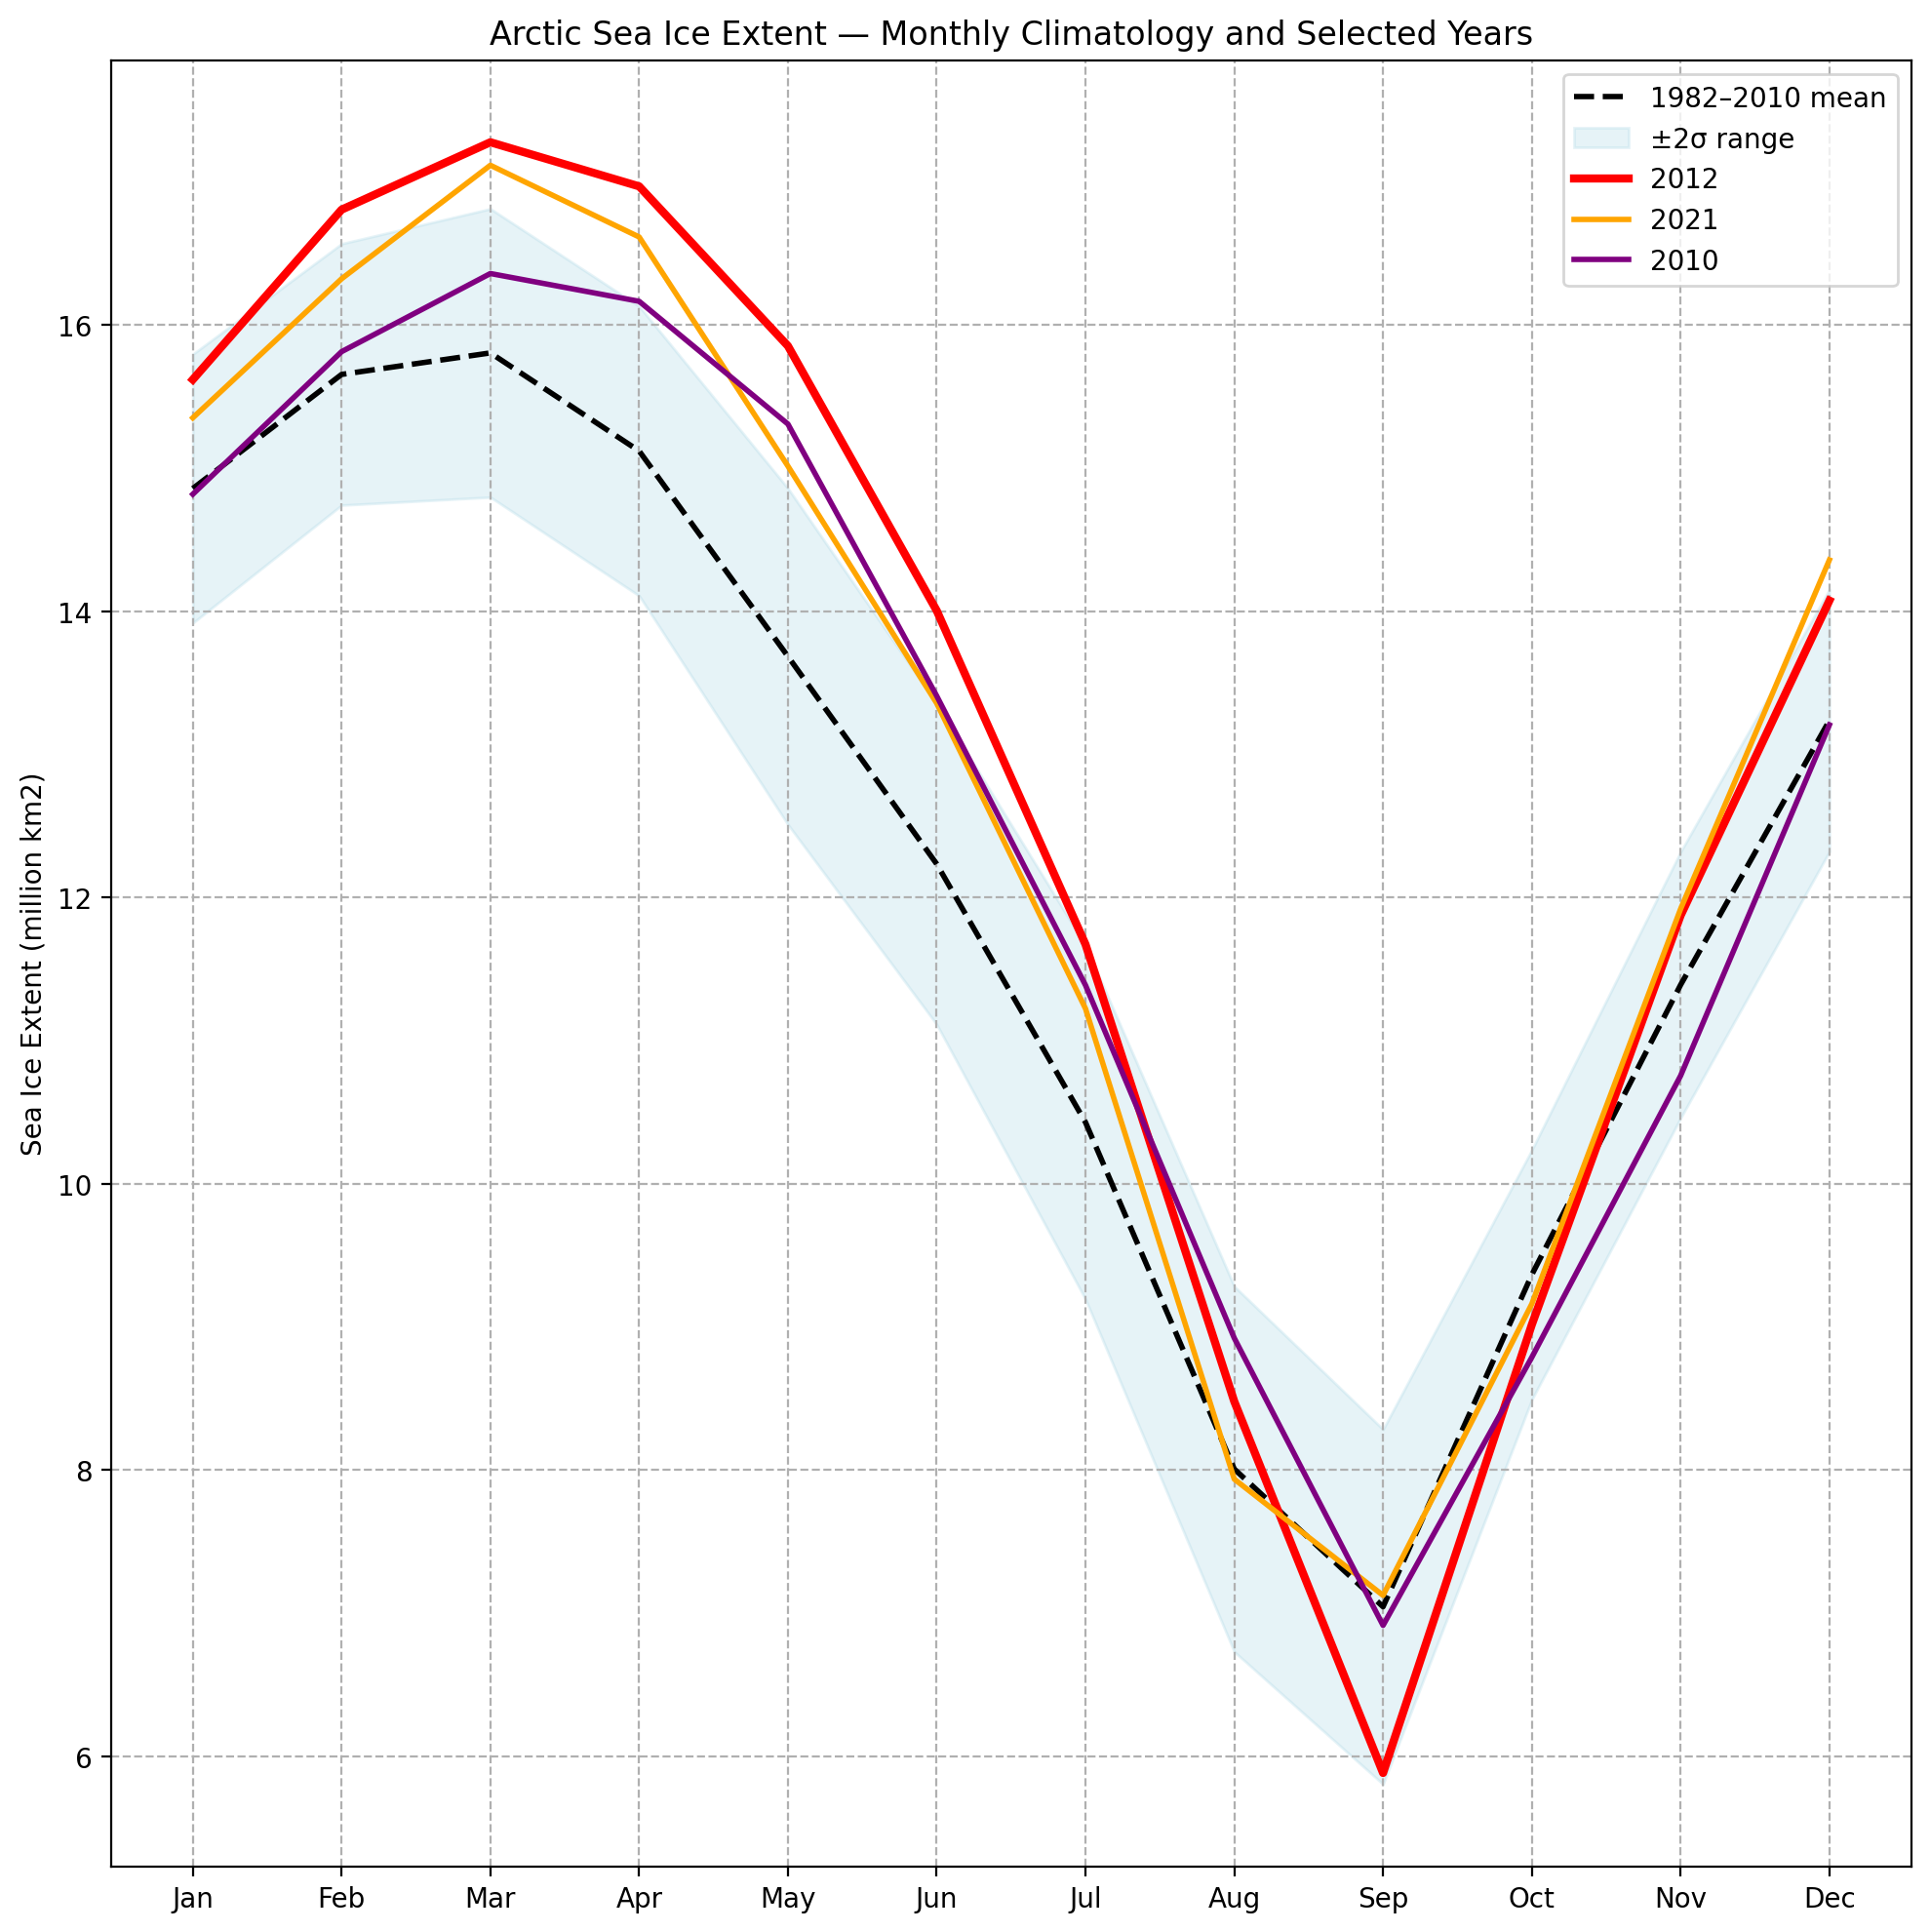

In [21]:
#create out plot using fill between to make a shaded std area 
fig, ax = plt.subplots(figsize= (10,10) )
ax.plot (months, Arctic_SIE_mean, linestyle="--", linewidth=2, color="k", label="1982–2010 mean")
ax.fill_between(months, Arctic_SIE_std_up, Arctic_SIE_std_low, color="lightblue", alpha=0.3, label="±2σ range")
ax.plot(months, Arctic_SIE_2012 , color="red", linewidth=3, label="2012")
ax.plot(months, Arctic_SIE_2021 , color="orange", linewidth=2, label="2021")
ax.plot(months, Arctic_SIE_2010 , color="purple", linewidth=2, label="2010")     
ax.set_title("Arctic Sea Ice Extent — Monthly Climatology and Selected Years")
ax.legend()
ax.set_ylabel("Sea Ice Extent (million km2)") 
ax.grid(linestyle = ('--'))


plt.tight_layout()
plt.show()

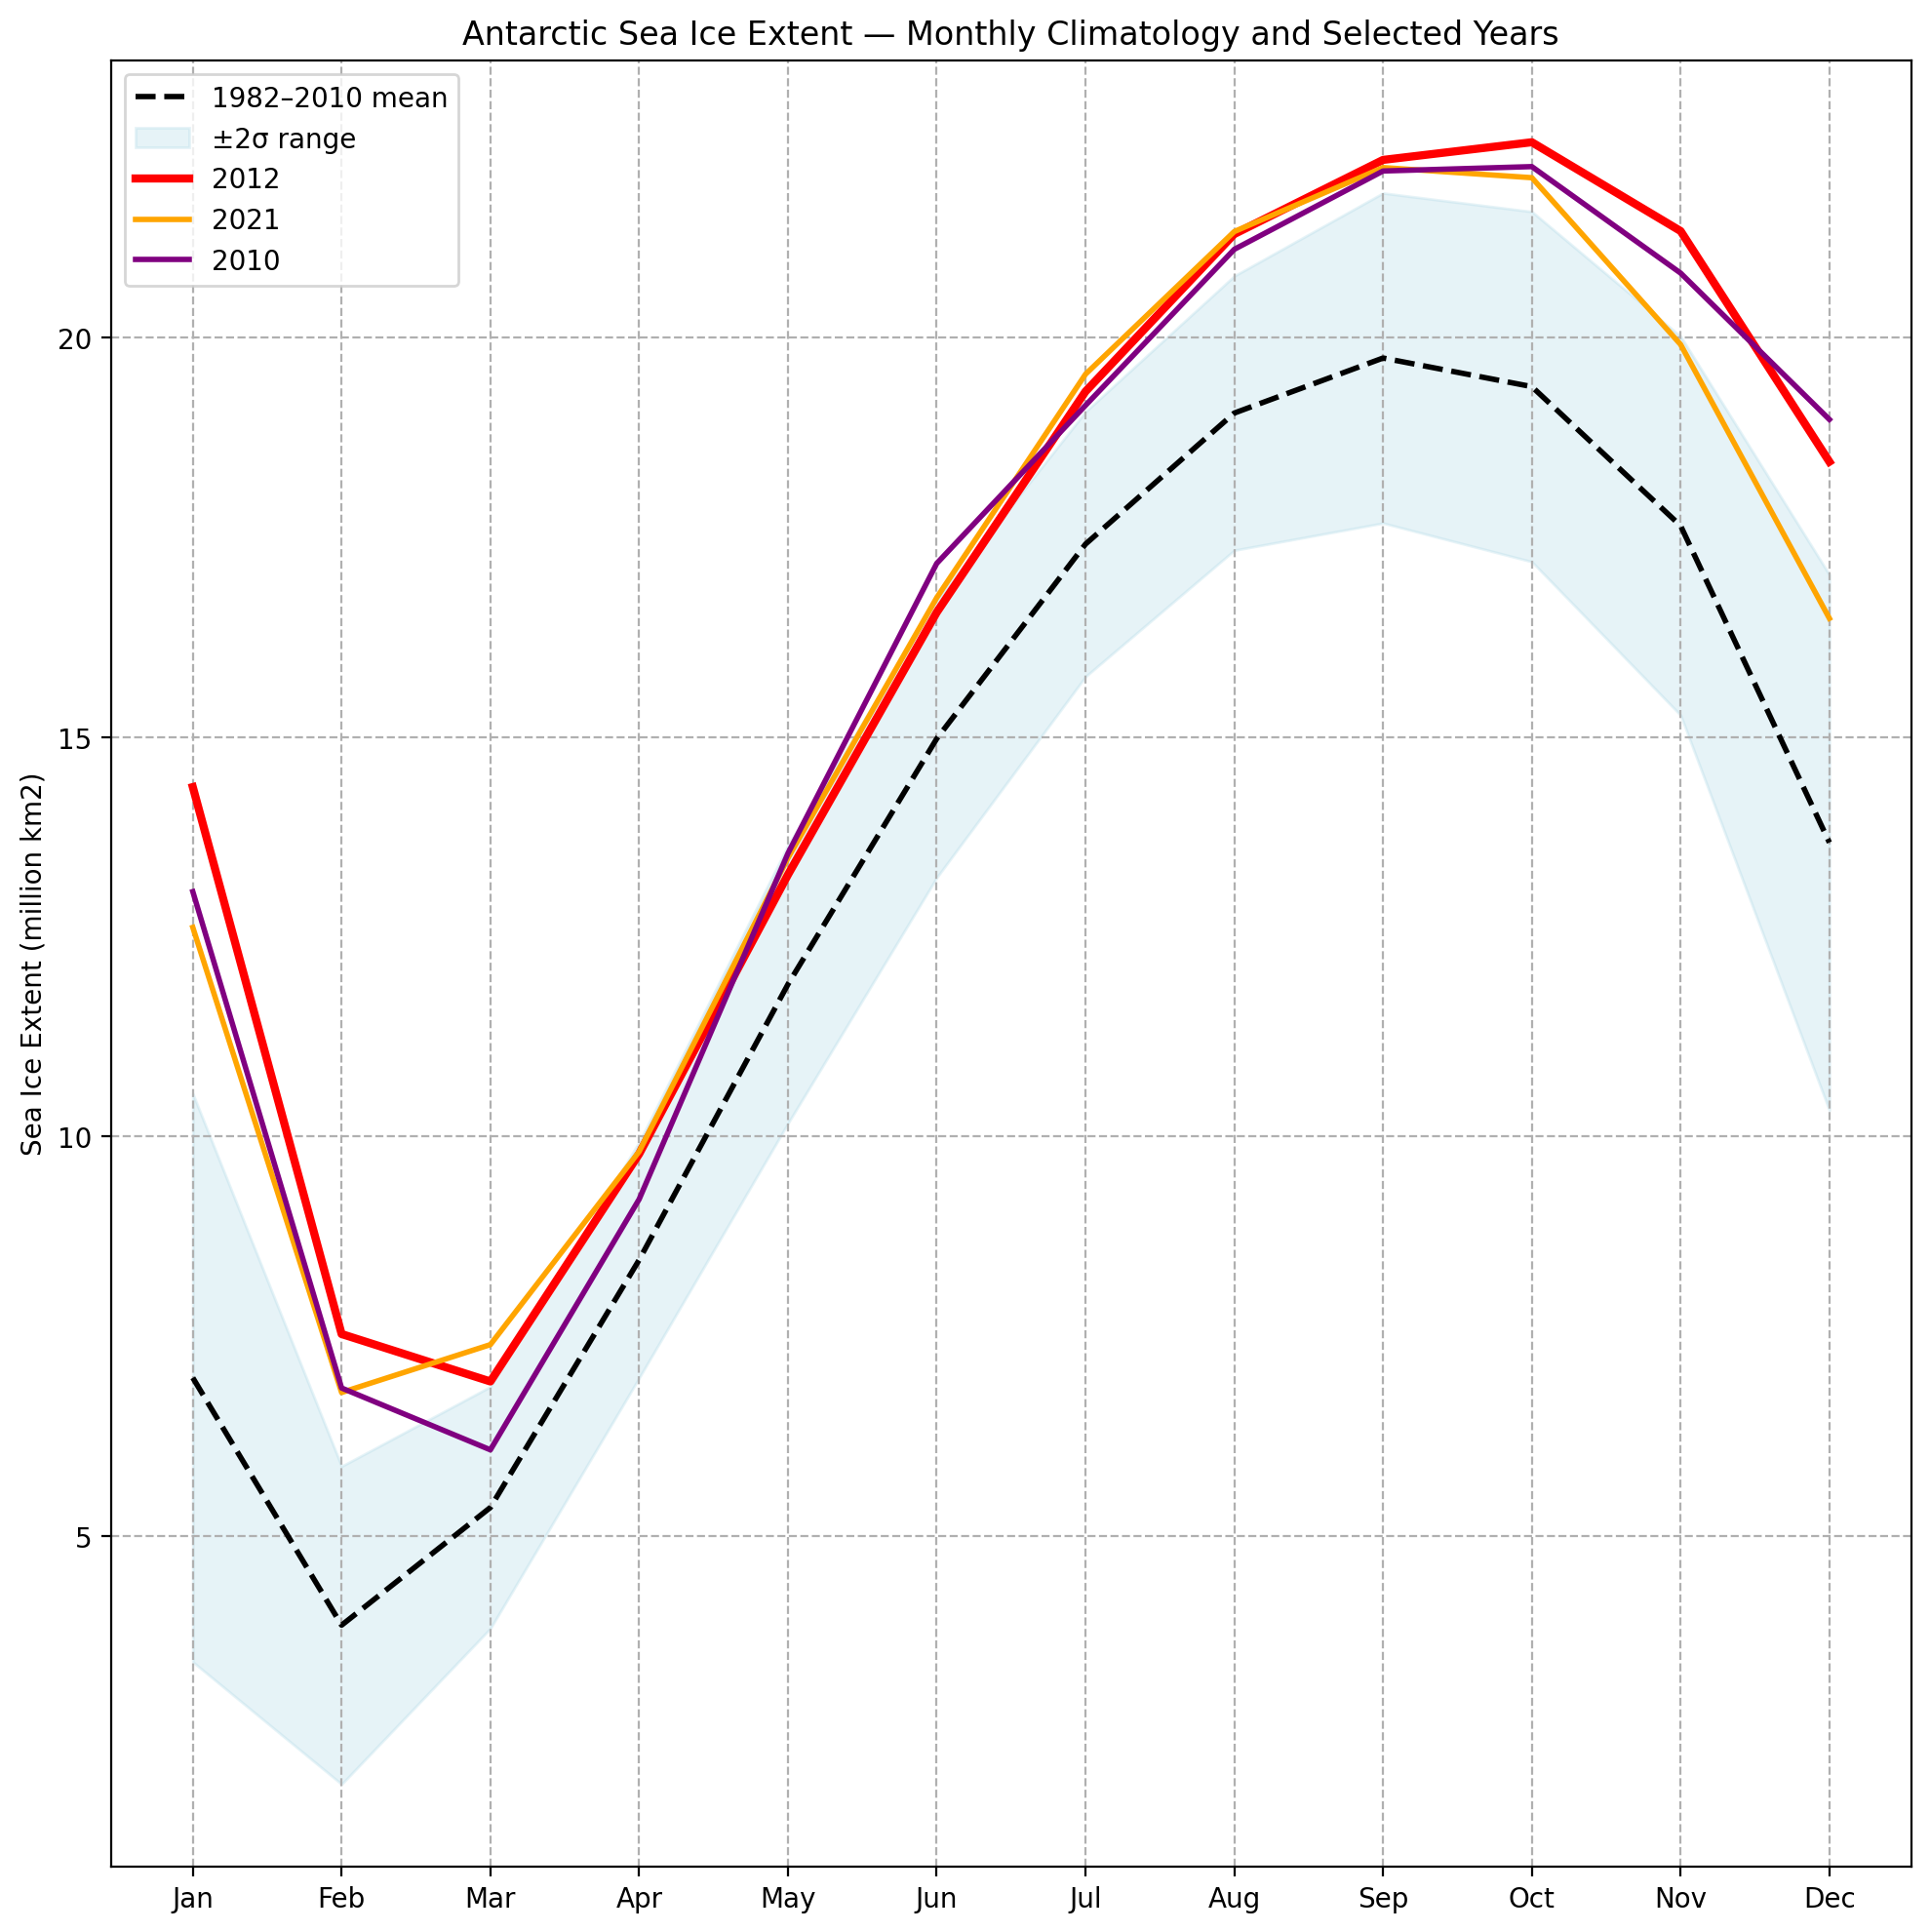

In [22]:
#create out plot using fill between to make a shaded std area 
fig, ax = plt.subplots(figsize= (10,10) )
ax.plot (months, Ant_SIE_mean, linestyle="--", linewidth=2, color="k", label="1982–2010 mean")
ax.fill_between(months, Ant_SIE_std_up, Ant_SIE_std_low, color="lightblue", alpha=0.3, label="±2σ range")
ax.plot(months, Ant_SIE_2012 , color="red", linewidth=3, label="2012")
ax.plot(months, Ant_SIE_2021 , color="orange", linewidth=2, label="2021")
ax.plot(months, Ant_SIE_2010 , color="purple", linewidth=2, label="2010")     
ax.set_title("Antarctic Sea Ice Extent — Monthly Climatology and Selected Years")
ax.legend()
ax.set_ylabel("Sea Ice Extent (million km2)") 
ax.grid(linestyle = ('--'))


plt.tight_layout()
plt.show()

![](https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147306/arctic_nsidc_2020259_plot.png)

## Repeat the above excercise but for Antarctic Sea Ice ... 

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its maximum ...

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its minimum ...

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its minimum ...

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its maximum ...